<h1 align="center">SpaceX  Falcon 9 first stage Landing Prediction - EDA</h1>

<div style="text-align:center">
    <img src='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/landing_1.gif'>
</div>

## Exploring and Preparing Data

In this notebook, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

## Import Libraries and Define Auxiliary Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings


## Defining Visualization Values

See all rows and columns in the dataset:

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Mute the warnings in the output:

In [3]:
warnings.filterwarnings("ignore")

Set the seaborn styles for the plots:

In [4]:
sns.set_style("whitegrid")
colors_arbitrary=sns.color_palette("Set2",3)
colors_arbitrary_2=sns.color_palette("Set2")

## Exploratory Data Analysis - Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary:

In [5]:
df= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv')
df.sample(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
77,78,2020-04-22,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058
2,3,2013-03-01,Falcon 9,677.0,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
19,20,2016-04-08,Falcon 9,3136.0,ISS,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1021,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute

In [6]:
df.isnull().sum()/df.shape[0]*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [7]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

### Calculate the number of launches on each site


The data contains several Space X  launch facilities: <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>Cape Canaveral Space</a> Launch Complex 40  **VAFB SLC 4E**, Vandenberg Air Force Base Space Launch Complex 4E **(SLC-4E)**, Kennedy Space Center Launch Complex 39A **KSC LC 39A**.The location of each Launch Is placed in the column **LaunchSite**

Next, let's see the number of launches for each site:


In [8]:
df['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

Each launch aims to an dedicated orbit, and here are some common orbit types:

*   <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),\[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.\[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[1]</a>.

*   <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>\[2]</a>.

*   <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" >\[3] </a>.

*   <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[4] <a>.

*   <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01#L1_point">\[5]</a> .

*   <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">\[6]</a>.

*   <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[7] </a>

*   <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[8] </a>

*   <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[9] </a>

*   <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[10] </a>

*   <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01"> \[11] </a>

some are shown in the following plot:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)


### Calculate the number and occurrence of each orbit

In [9]:
landing_outcomes=df['Outcome'].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

**True Ocean** means the mission outcome was successfully  landed to a specific region of the ocean while **False Ocean** means the mission outcome was unsuccessfully landed to a specific region of the ocean. **True RTLS** means the mission outcome was successfully  landed to a ground pad **False RTLS** means the mission outcome was unsuccessfully landed to a ground pad.**True ASDS** means the mission outcome was successfully  landed to a drone ship **False ASDS** means the mission outcome was unsuccessfully landed to a drone ship. **None ASDS** and **None None** these represent a failure to land.

In [10]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


We create a set of outcomes where the second stage did not land successfully:

In [11]:
bad_outcomes=list(set(landing_outcomes.keys()[[1,3,5,6,7]]))
bad_outcomes


['False Ocean', 'None ASDS', 'False RTLS', 'None None', 'False ASDS']

### Create a landing outcome label from Outcome column

Using the **Outcome**,  create a list where the element is zero if the corresponding  row  in  **Outcome** is in the set **bad_outcome**; otherwise, it's one. Then assign it to the variable **landing_class**:

In [12]:
list_outcome=df['Outcome']
landing_class=[]

for element in list_outcome:
    landing = " "
    for value in bad_outcomes:
        if element == value:
            landing = 0
    if landing != 0:
        landing = 1
 
    landing_class.append(landing)

Using the **Outcome**,  create a list where the element is zero if the corresponding  row  in  **Outcome** is in the set **bad_outcome**; otherwise, it's one. Then assign it to the variable **landing_class**:


In [13]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [14]:
df[4:9]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.0,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.0,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0


We can use the following line of code to determine  the success rate:

In [15]:
df["Class"].mean()

0.6666666666666666

We can now export it to a CSV:

In [16]:
project_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(project_dir, "data", "processed")
os.makedirs(data_dir, exist_ok=True)

In [17]:
output_path = os.path.join(data_dir, "dataset_part_2.csv")
df.to_csv(output_path, index=False)

## Exploratory Data Analysis - Data Visualization

Let's read the SpaceX dataset into a Pandas dataframe and print its summary:

In [18]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.sample(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
20,21,2016-05-06,Falcon 9,4696.0,GTO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,0,B1022,-80.577366,28.561857,1
22,23,2016-07-18,Falcon 9,2257.0,ISS,CCAFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,2.0,1,B1025,-80.577366,28.561857,1
42,43,2017-12-23,Falcon 9,9600.0,PO,VAFB SLC 4E,True Ocean,2,True,True,False,NaN,3.0,1,B1036,-120.610829,34.632093,1


First, let's try to see how the **FlightNumber** (indicating the continuous launch attempts.) and **Payload** variables would affect the launch outcome.

We can plot out the **FlightNumber** vs. **PayloadMass** and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


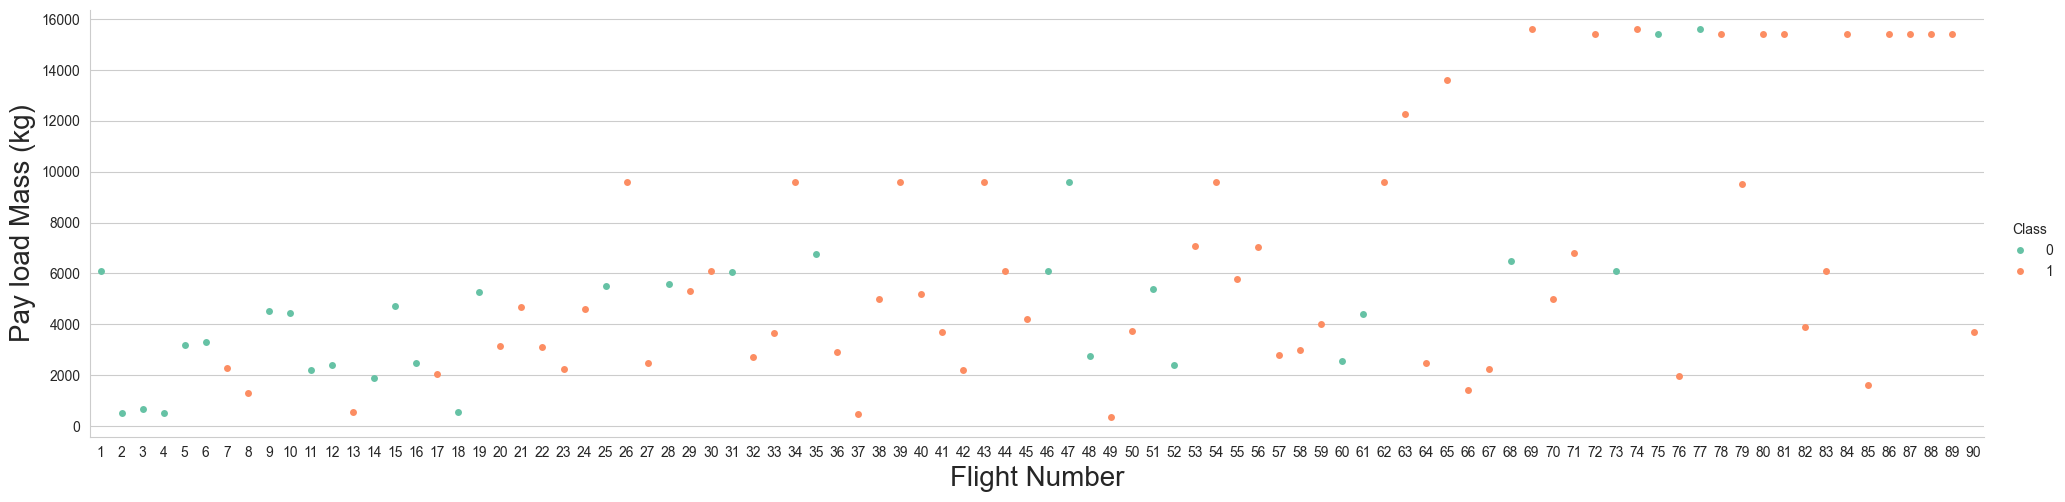

In [19]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect =4, palette=colors_arbitrary)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)

plt.show()

Next, let's drill down to each site visualize its detailed launch records.


Let's to plot **FlightNumber** vs **LaunchSite**:


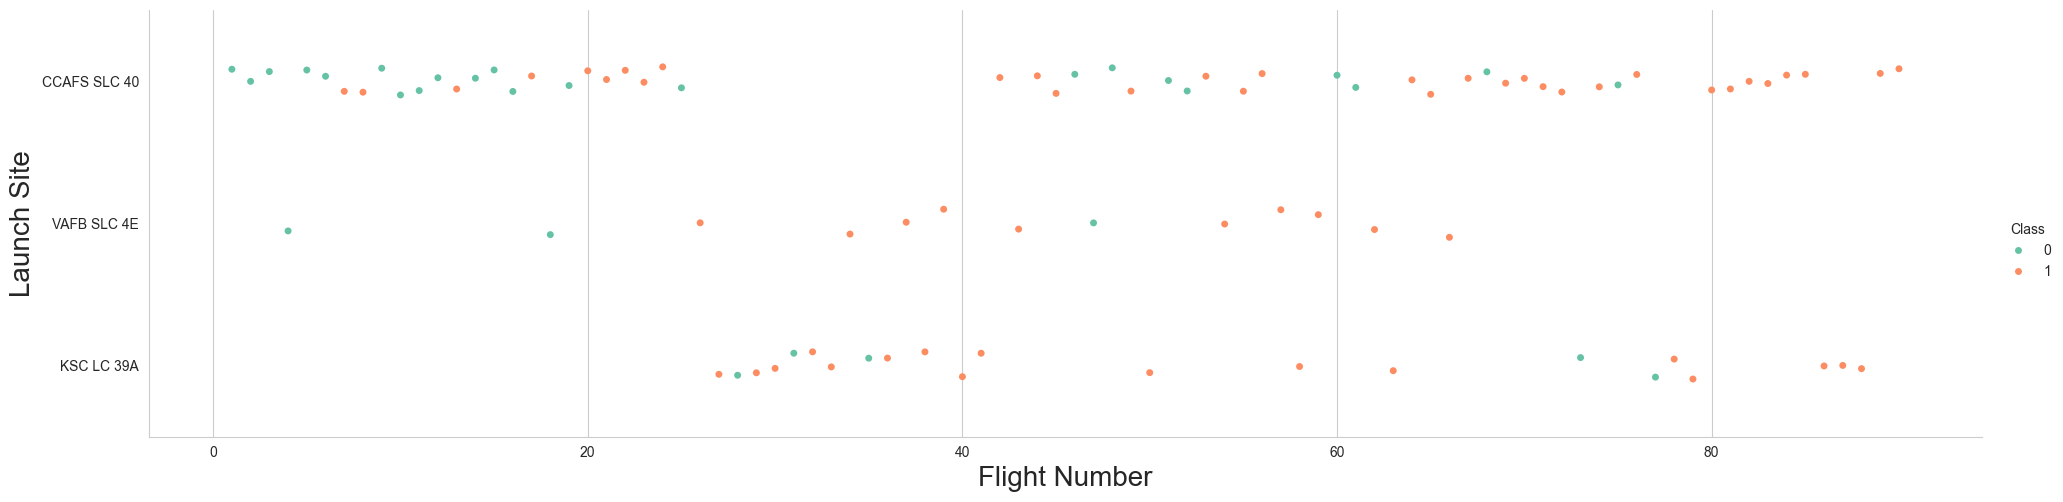

In [20]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect =4, palette=colors_arbitrary)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)

plt.show()

We see that at all sites, as the flight number increases, the successful landings increase. Another insight is that CCAFS SLC-40 was the test site; we can see at the other sites that there are fewer failed landings.

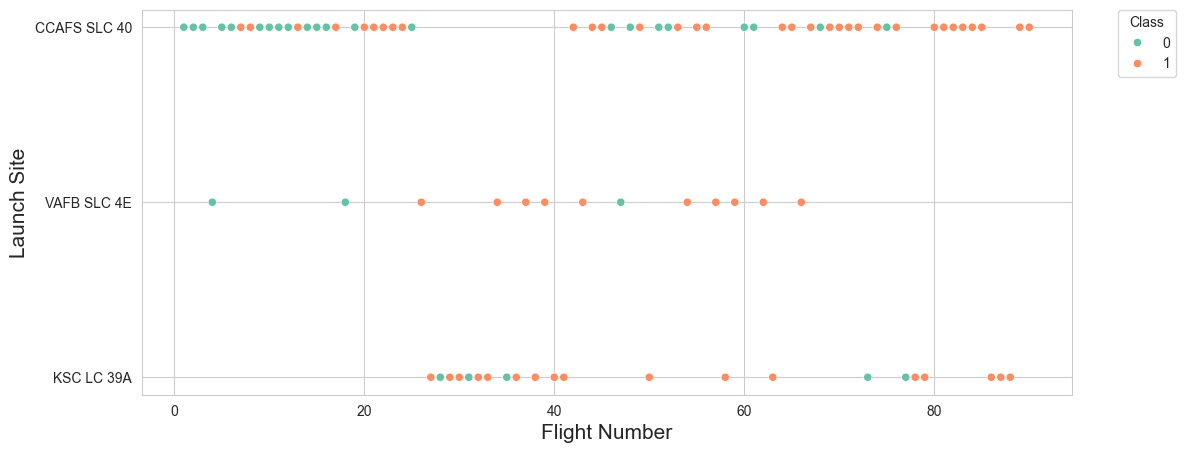

In [21]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, palette=colors_arbitrary, legend='full')
plt.xlabel("Flight Number",fontsize=15)
plt.ylabel("Launch Site",fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title="Class")

plt.show()

We see that different launch sites have different success rates. **CCAFS LC-40**, has a success rate of 60 %, while  **KSC LC-39A** and **VAFB SLC 4E** has a success rate of 77%.


We also want to observe if there is any relationship between launch sites and their payload mass.

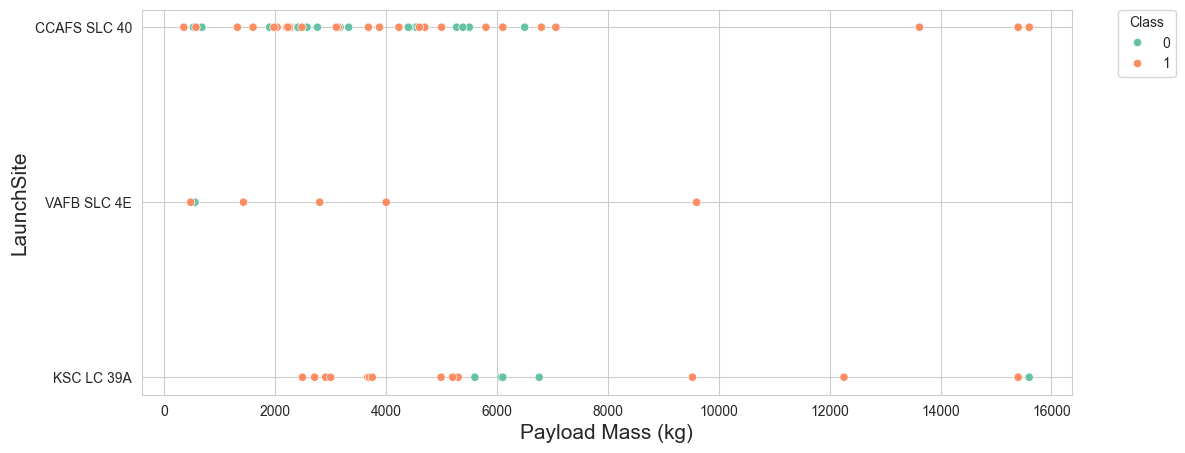

In [22]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, palette=colors_arbitrary, legend='full')
plt.xlabel("Payload Mass (kg)",fontsize=15)
plt.ylabel('LaunchSite',fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,title="Class")

plt.show()

We see that the payload mass doesn't have a relationship with the launch site in terms of increasing the quantity of successful landings.

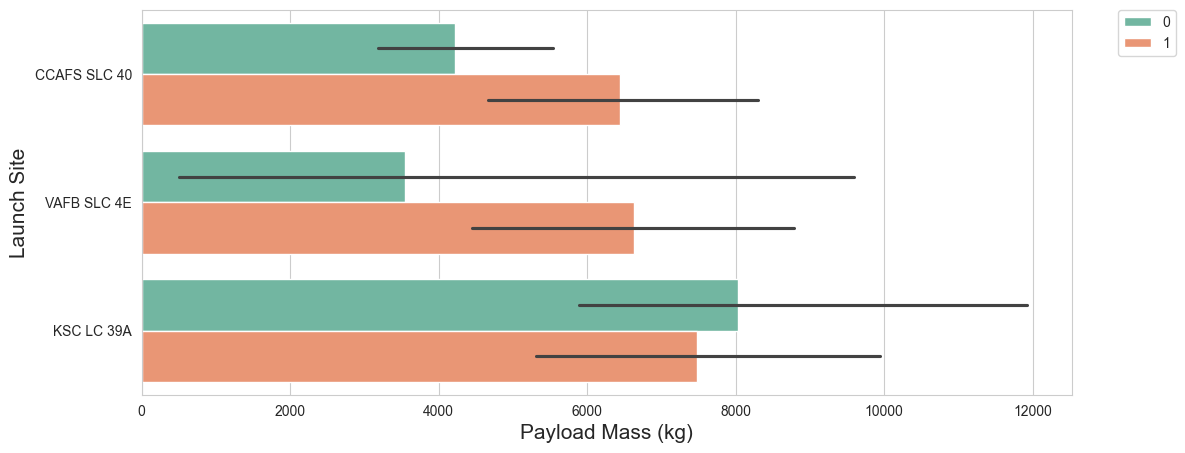

In [23]:
plt.figure(figsize=(12, 5))

sns.barplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, palette=colors_arbitrary, legend='full')
plt.xlabel("Payload Mass (kg)",fontsize=15)
plt.ylabel("Launch Site",fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()


Now if we observe Payload Vs. Launch Site scatter point chart, we will find for the VAFB-SLC launchsite there are no rockets launched for heavy payload mass (greater than 10000).

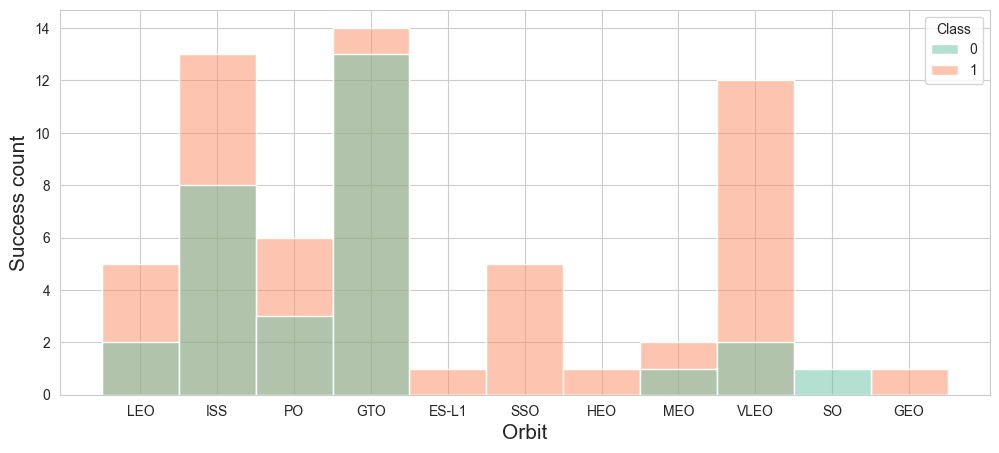

In [24]:
plt.figure(figsize=(12, 5))

sns.histplot(x="Orbit", hue="Class", data=df, palette=colors_arbitrary, legend='full')
plt.xlabel("Orbit",fontsize=15)
plt.ylabel('Success count',fontsize=15)
    
plt.show()

There are a high number of success landing un VLEO and SSO orbits. HEO and ES-L1 could be a good orbits, but we need more information.

Let's create a **bar chart** for the sucess rate of each orbit:

In [25]:
dfgb=df.groupby(['Orbit']).mean(numeric_only=True)
dfgb.reset_index(inplace=True)
dfgb

,Orbit,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
0,ES-L1,13.000000,570.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-80.577366,28.561857,1.000000
1,GEO,83.000000,6104.959412,2.000000,1.000000,1.000000,1.000000,5.000000,2.000000,-80.577366,28.561857,1.000000
2,GTO,35.037037,5011.994444,1.407407,0.629630,0.333333,0.629630,3.037037,0.962963,-80.586229,28.577258,0.518519
3,HEO,49.000000,350.000000,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
4,ISS,39.142857,3279.938095,1.238095,0.809524,0.238095,0.857143,3.142857,1.285714,-80.583697,28.572857,0.619048
5,LEO,20.000000,3882.839748,1.000000,0.571429,0.000000,0.714286,2.142857,0.428571,-80.584963,28.575058,0.714286
6,MEO,77.666667,3987.000000,1.000000,0.666667,0.000000,0.666667,5.000000,0.666667,-80.577366,28.561857,0.666667
7,PO,36.333333,7583.666667,1.333333,0.888889,0.333333,0.777778,3.222222,1.555556,-120.610829,34.632093,0.666667
8,SO,73.000000,6104.959412,4.000000,0.000000,1.000000,0.000000,5.000000,3.000000,-80.603956,28.608058,0.000000
9,SSO,60.800000,2060.000000,2.400000,1.000000,0.800000,1.000000,4.600000,3.200000,-112.604136,33.418046,1.000000


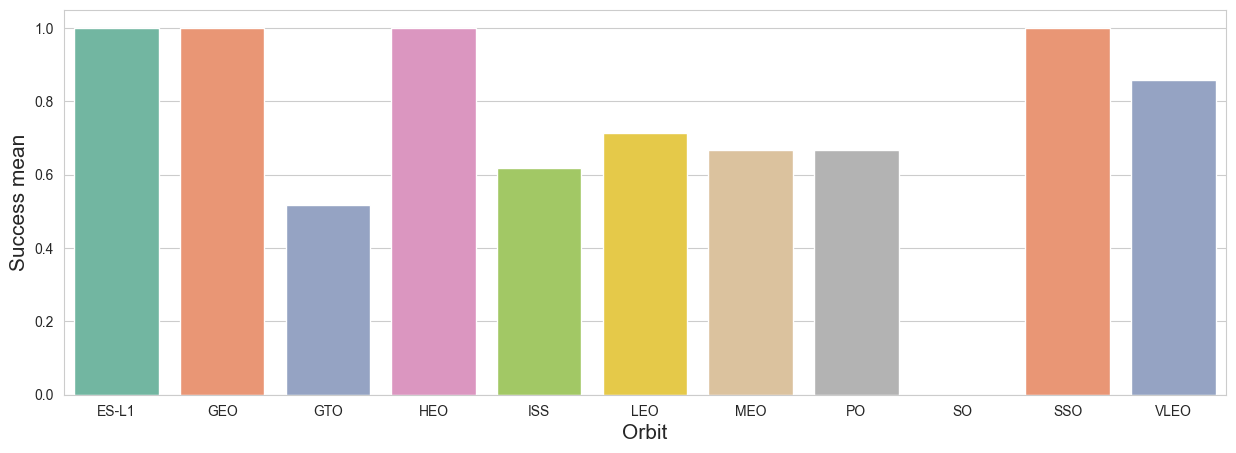

In [26]:
plt.figure(figsize=(15, 5))

sns.barplot(x="Orbit", y="Class", data=dfgb, palette=colors_arbitrary_2)
plt.xlabel("Orbit",fontsize=15)
plt.ylabel('Success mean',fontsize=15)

plt.show()

There are a high number of success landing un VLEO and SSO orbits. HEO and ES-L1 could be a good orbits but we need more information. 

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type:


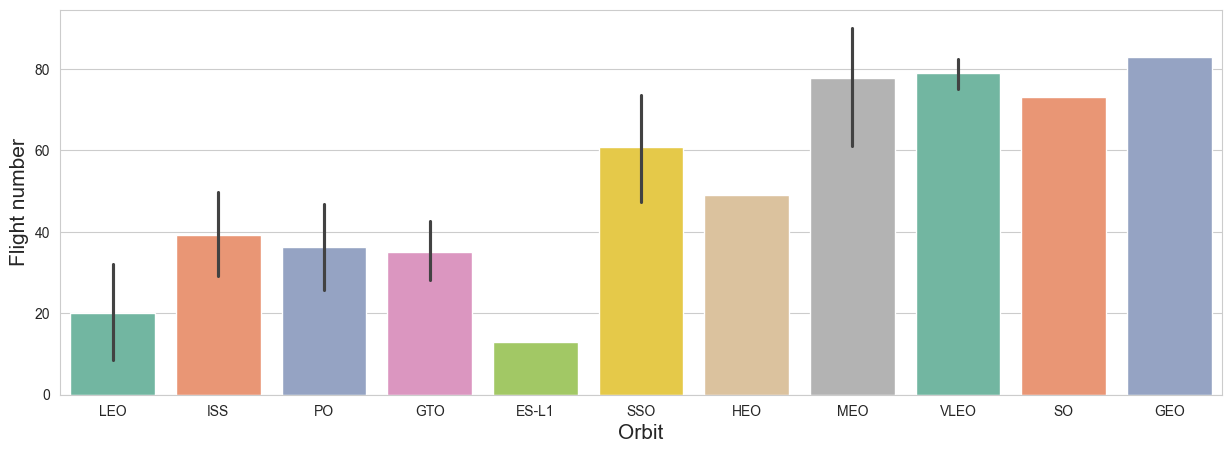

In [27]:
plt.figure(figsize=(15, 5))

sns.barplot(x="Orbit", y="FlightNumber", data=df, palette=colors_arbitrary_2)
plt.xlabel("Orbit",fontsize=15)
plt.ylabel('Flight number',fontsize=15)

plt.show()

MEO, VLEO, SSO, and GEO have the most flight numbers

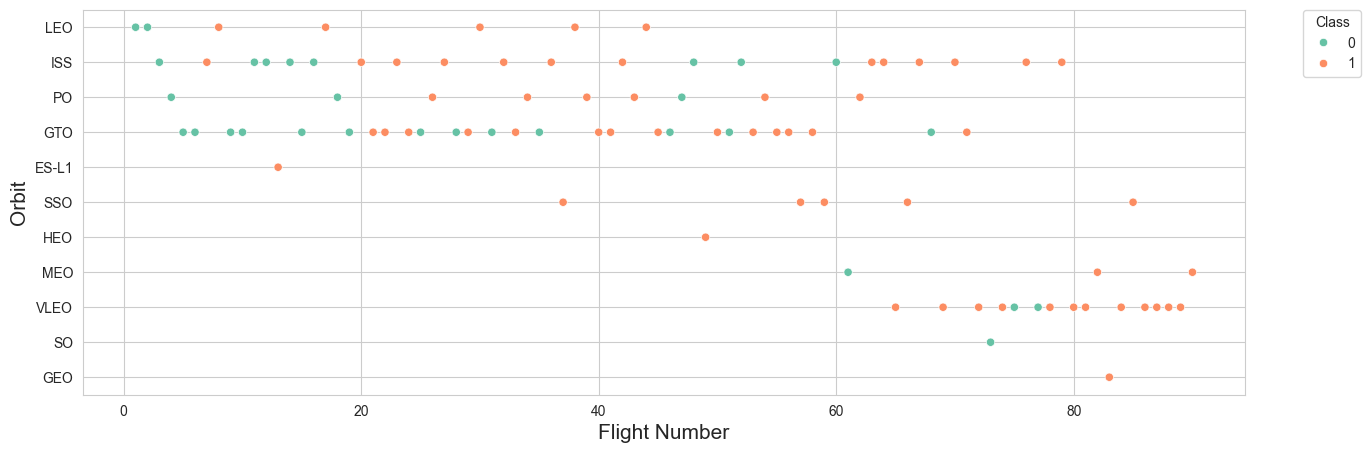

In [28]:
plt.figure(figsize=(15, 5))

sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df, palette=colors_arbitrary, legend='full')
plt.xlabel("Flight Number",fontsize=15)
plt.ylabel('Orbit',fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,title="Class")

plt.show()

We see that in the LEO orbit the success landing appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit. By the way, GEO has over 80 flight numbers and the best successful landing quality.

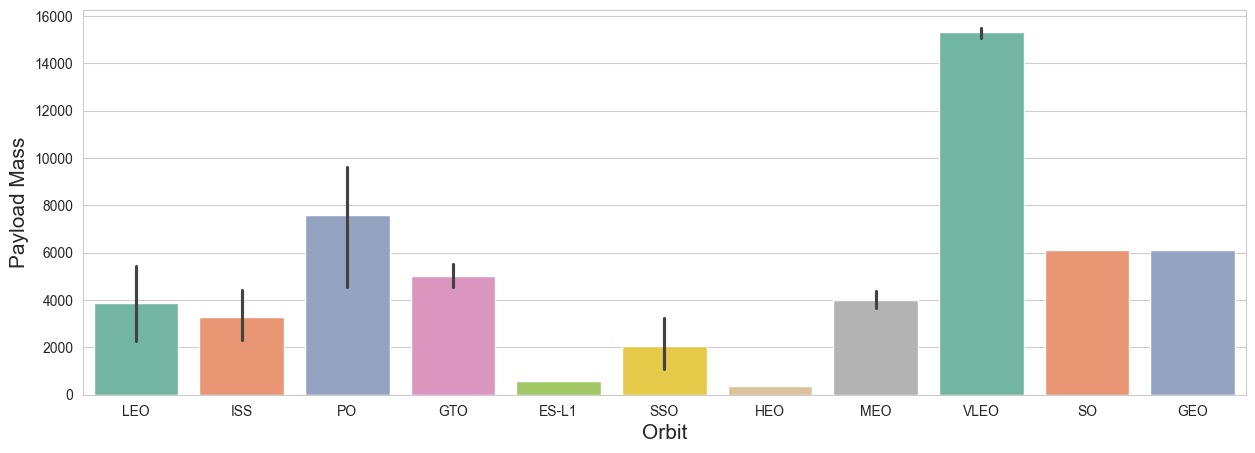

In [29]:
plt.figure(figsize=(15, 5))

sns.barplot(x="Orbit", y="PayloadMass", data=df, palette=colors_arbitrary_2)
plt.xlabel('Orbit',fontsize=15)
plt.ylabel('Payload Mass',fontsize=15)

plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type:

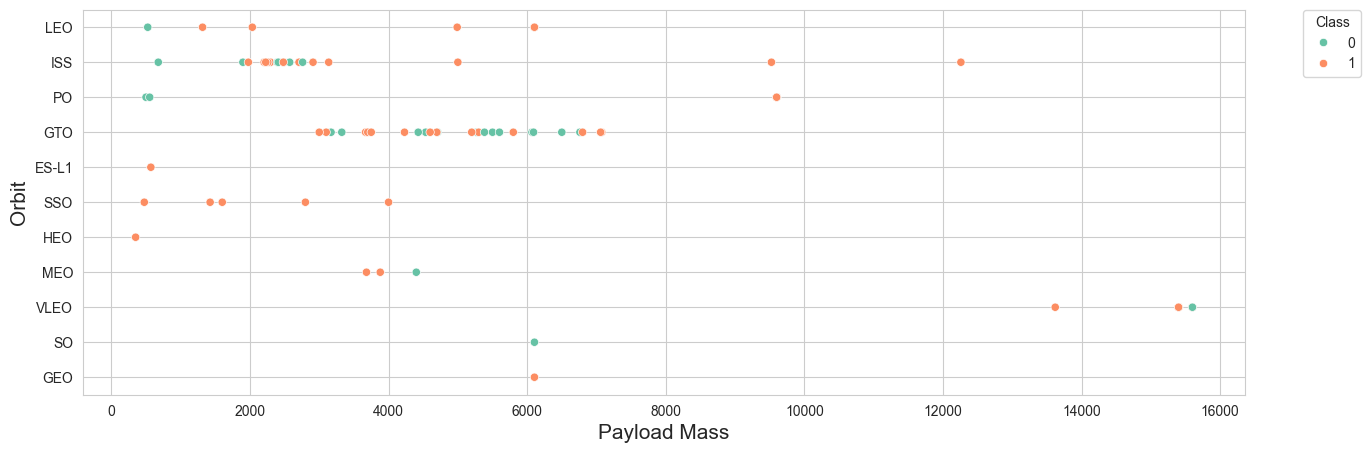

In [30]:
plt.figure(figsize=(15, 5))

sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df, palette=colors_arbitrary, legend='full')
plt.xlabel("Payload Mass",fontsize=15)
plt.ylabel('Orbit',fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,title="Class")

plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar, LEO and ISS.

However, for GTO we cannot distinguish this well as both positive landing rate and negative landing (unsuccessful mission) are both there here.

We can plot a line chart with x axis to be **Year** and y axis to be average success rate, to get the average launch success trend.

Let's extract the year from the date column:

In [31]:
year=[]

for i in df["Date"]:
    year.append(i.split("-")[0])

df['Year'] = year
df.sample(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
79,80,2020-06-04,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,5,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1049,-80.577366,28.561857,1,2020
33,34,2017-06-25,Falcon 9,9600.0,PO,VAFB SLC 4E,True ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,3.0,1,B1036,-120.610829,34.632093,1,2017
58,59,2018-12-03,Falcon 9,4000.0,SSO,VAFB SLC 4E,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,3,B1046,-120.610829,34.632093,1,2018


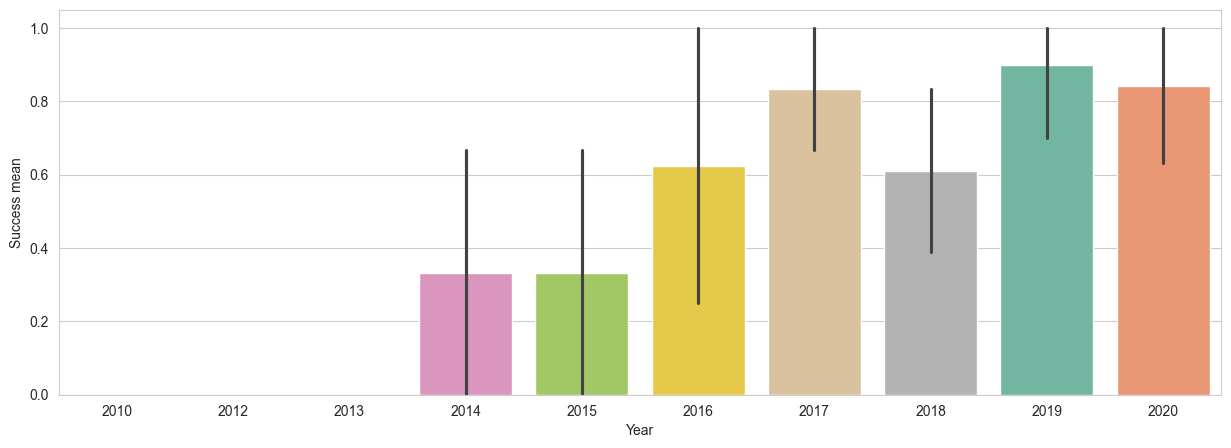

In [32]:
plt.figure(figsize=(15, 5))

sns.barplot(x="Year", y="Class", data=df, palette=colors_arbitrary_2)
plt.ylabel('Success mean',fontsize=10)

plt.show()

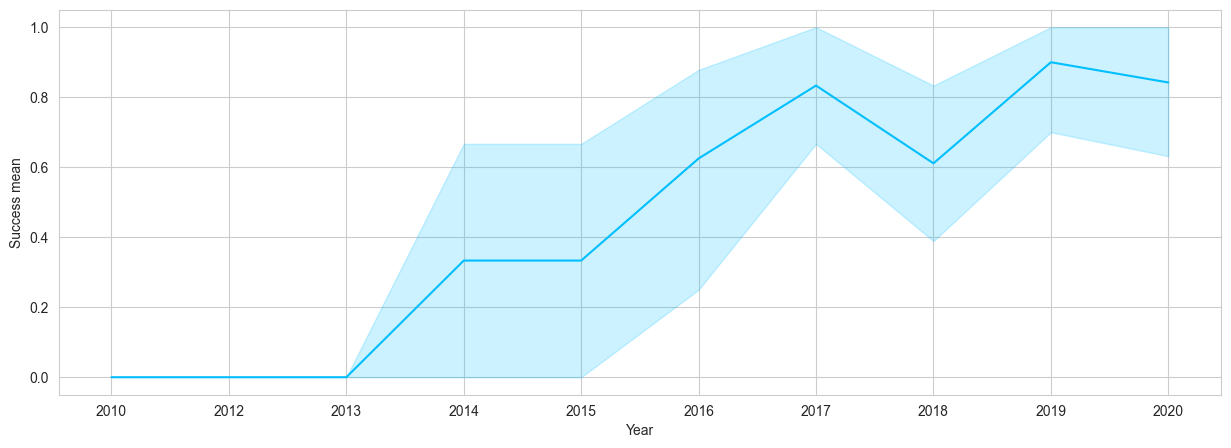

In [33]:
plt.figure(figsize=(15, 5))

sns.lineplot(x="Year", y="Class", data=df, color='deepskyblue')
plt.ylabel('Success mean',fontsize=10)

plt.show()

We can observe that the sucess rate since 2013 kept increasing till 2020
